In [2]:
!ls data

fruit_label_ids.csv fruit_labels.csv    fruit_values.csv


In [10]:
# (1) read data from fruit_values.csv -> X 

f = open("data/fruit_values.csv", "r") # Open file for reading
alldata = []
for line in f.readlines(): # Loop over all lines in the file
    alldata.append([float(x) for x in line.split(sep=",")])
f.close() # Close file

In [14]:
import numpy as np

alldata = np.array(alldata) # Convert list to numpy nd array
X = alldata[:, [0, 1]] # Extracting the first two columns
X.shape

(30, 2)

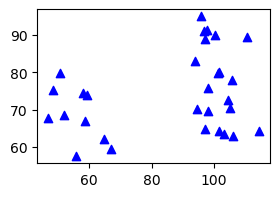

In [27]:
# (2) Making visualization using the first two freatures
from matplotlib import pyplot as plt
plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1], 
            c='b', marker='^')

[[100.53584744  89.98623786]
 [ 46.77858369  67.72484983]]


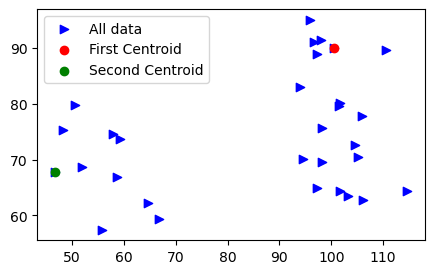

In [54]:
# K = 2 -> randomly pick up 2 points from data set
i, j = np.random.randint(30, size=(2))
c = X[[i, j],:]

plt.figure(figsize=(5, 3))
print(c)

plt.scatter(X[:, 0], X[:, 1], 
            c='b', marker='>', label="All data")

plt.scatter(c[0, 0], c[0, 1], c='r', label="First Centroid")
plt.scatter(c[1, 0], c[1, 1], c='g', label="Second Centroid")
plt.legend()

In [44]:
convergence = False

In [45]:
def distance(x, y):
    """
    calculate distance between x and y
    params x, y: 1D numpy array
    """
    d = np.sqrt(np.sum((x - y)**2))
    return d

In [47]:
distance(c[0], c[1])

9.937849971591861

In [55]:
# Predicted labels for all data points
# 0 for the first cluster
# 1 for teh seconde cluster
labels = np.zeros((30,))
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [59]:
# Main Loop
# Step 1: Assigning labels for all data points
dist1 = [distance(data_point, c[0]) for data_point in X]
dist2 = [distance(data_point, c[1]) for data_point in X]  

for i in range(30):
    if dist1[i] > dist2[i]:
        labels[i] = 1
    else:
        labels[i] = 0
print(labels)

[1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0.]


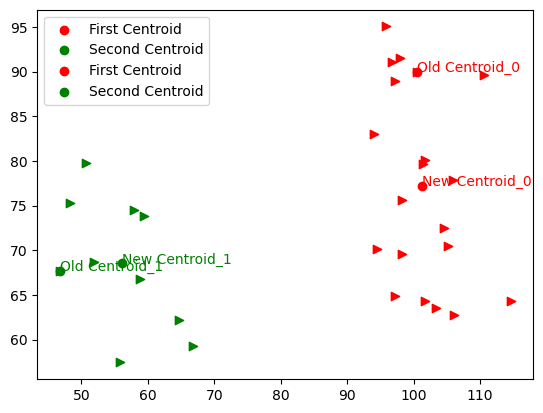

In [87]:
# Plotting all data points with 
# color corresponding to the assigned labels
for i in range(30):
    color = "g" if labels[i] == 1 else "r"
    plt.scatter(X[i, 0], X[i, 1], 
                c=color, marker='>')

# Ploting centroids  
plt.scatter(c[0, 0], c[0, 1], c='r',
            label="First Centroid")
plt.scatter(c[1, 0], c[1, 1], 
            c='g', label="Second Centroid")
plt.text(c[0, 0], c[0, 1], "Old Centroid_0", c="r")
plt.text(c[1, 0], c[1, 1], "Old Centroid_1", c="g")

# Ploting new centroids
new_c = np.array([np.mean(X[labels==i], axis=0) for i in [0, 1]])

plt.scatter(new_c[0, 0], new_c[0, 1], c='r',
            label="First Centroid")
plt.scatter(new_c[1, 0], new_c[1, 1], 
            c='g', label="Second Centroid")
plt.text(new_c[0, 0], new_c[0, 1], "New Centroid_0", c="r")
plt.text(new_c[1, 0], new_c[1, 1], "New Centroid_1", c="g")

# Print out legend for the plot
plt.legend()



In [88]:
import copy
c = copy.deepcopy(new_c)

dist1 = [distance(data_point, c[0]) for data_point in X]
dist2 = [distance(data_point, c[1]) for data_point in X]  

for i in range(30):
    if dist1[i] > dist2[i]:
        labels[i] = 1
    else:
        labels[i] = 0
print(labels)

[1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0.]


Text(56.08473818434006, 68.55042393961281, 'Old Centroid_1')

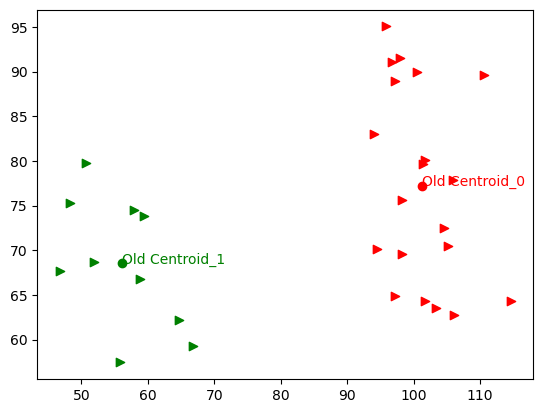

In [89]:
# Plotting all data points with 
# color corresponding to the assigned labels
for i in range(30):
    color = "g" if labels[i] == 1 else "r"
    plt.scatter(X[i, 0], X[i, 1], 
                c=color, marker='>')

# Ploting centroids  
plt.scatter(c[0, 0], c[0, 1], c='r',
            label="First Centroid")
plt.scatter(c[1, 0], c[1, 1], 
            c='g', label="Second Centroid")
plt.text(c[0, 0], c[0, 1], "Old Centroid_0", c="r")
plt.text(c[1, 0], c[1, 1], "Old Centroid_1", c="g")